# 15.5 Zadanie - Pipeline

#### Importyjemy niezbędne biblioteki

In [3]:
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja
import matplotlib.pyplot as plt
import seaborn as sns

# podział danych na zbiory treningowe/walidacyjne/testowe
from sklearn.model_selection import train_test_split, GridSearchCV

# budowa Pipeline
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, PowerTransformer

# redukcja wymiarowości
from sklearn.decomposition import PCA

# model
from sklearn.linear_model import LogisticRegression

# ewaluacja
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, f1_score, roc_auc_score

# import modeli z poprzedniego modułu 14.5 do porówania
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

#### Import danych które posłuża do wytrenowania modelu. Dzięki info() widać że mamy brakujące dane

In [5]:
penguins = pd.read_csv('penguins.csv')
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


#### W brakujących danych brakuje wszystkich danych prócz labelek. Takie dane są bezużyteczne gdyż w żaden sposób nie pomogą określić kategorii na podstawie którejkolwiek z kolunm. W ramach ćwiczenia pozostawimy te dane i uzupełnimy wartościami średnimi, dla gatunku 0 i 1. 

In [7]:
penguins[penguins['CulmenLength'].isnull()==True]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [8]:
num_features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
target = 'Species'

#### Poszczególne kategorie nie są zbalansowane

In [10]:
pd.Series(penguins['Species']).value_counts(normalize=True)

Species
0    0.441860
1    0.360465
2    0.197674
Name: proportion, dtype: float64

#### By zwizyalizowac dane podobnie jak w zadaniu 14.5 wyświetlamy histogramy dla poszczególnych kolumn

C:\Users\piotr\AppData\Local\Temp\ipykernel_17500\3982806616.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='green', label='Pingwin grupy 0')
C:\Users\piotr\AppData\Local\Temp\ipykernel_17500\3982806616.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

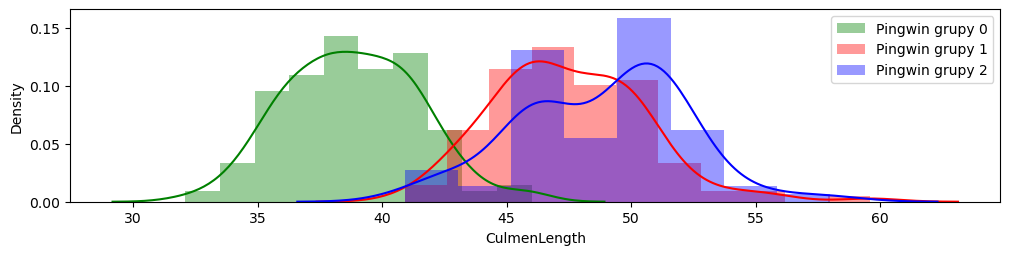

C:\Users\piotr\AppData\Local\Temp\ipykernel_17500\3982806616.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='green', label='Pingwin grupy 0')
C:\Users\piotr\AppData\Local\Temp\ipykernel_17500\3982806616.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

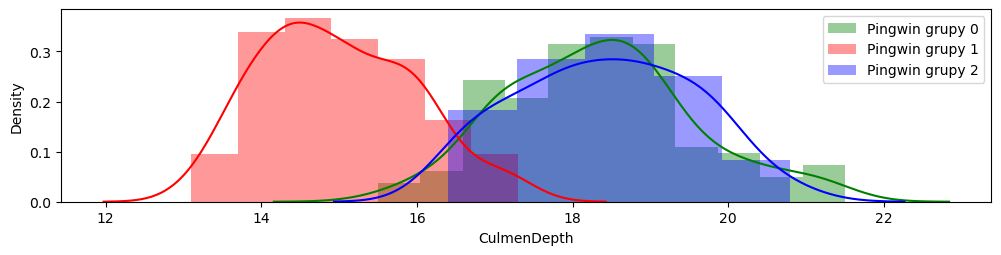

C:\Users\piotr\AppData\Local\Temp\ipykernel_17500\3982806616.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='green', label='Pingwin grupy 0')
C:\Users\piotr\AppData\Local\Temp\ipykernel_17500\3982806616.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

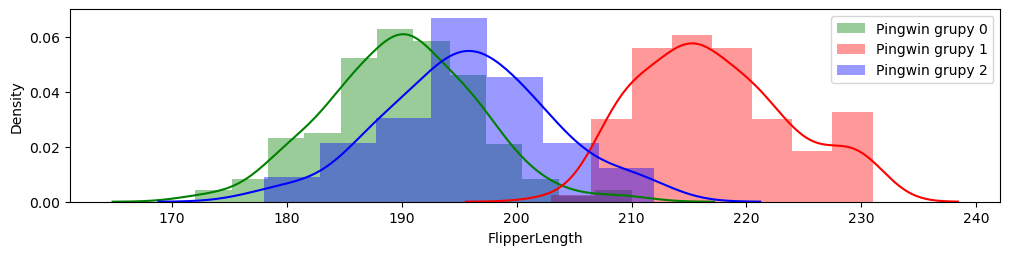

C:\Users\piotr\AppData\Local\Temp\ipykernel_17500\3982806616.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='green', label='Pingwin grupy 0')
C:\Users\piotr\AppData\Local\Temp\ipykernel_17500\3982806616.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

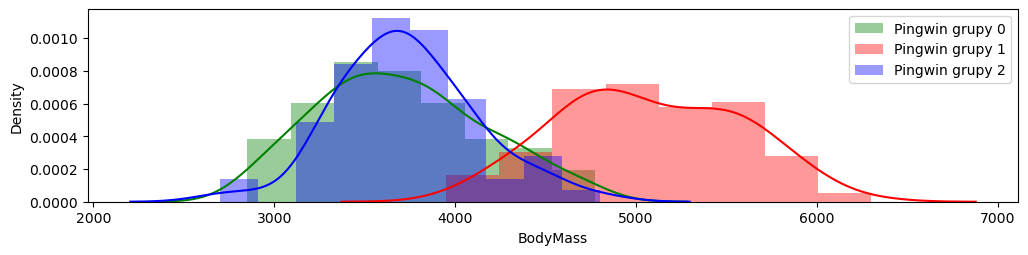

In [12]:
for col in num_features:
    plt.figure(figsize=(12, 2.5))
    sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='green', label='Pingwin grupy 0')
    sns.distplot(penguins.loc[penguins['Species']==1, col], kde=True, color='red', label='Pingwin grupy 1')
    sns.distplot(penguins.loc[penguins['Species']==2, col], kde=True, color='blue', label='Pingwin grupy 2')
    plt.legend(loc='upper right')
    plt.show()

#### Określamy nasze X oraz y 

In [14]:
X = penguins.drop(['Species'], axis=1).copy()
y = penguins['Species'].copy()

#### Sprawdzamy czy istnieje korelacja pomiedzy poszczególnymi kolumnami. Na poniższej macierzy widać silne korelacje pomiedzy danymi - dzięki tej informacji dowiadujemy się że sensowne bedzie zastosowanie PCA czyli analize głównych składowych. 

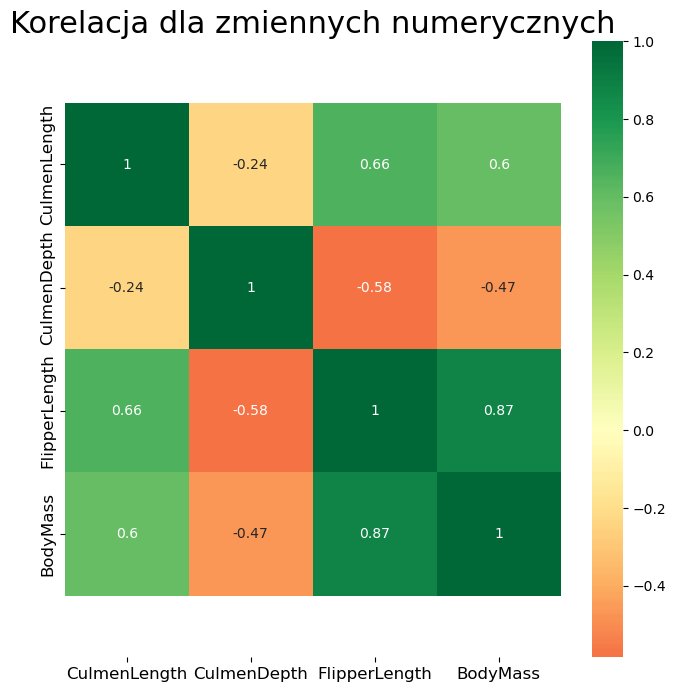

In [16]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja dla zmiennych numerycznych', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Rozdzielamy dane na zbiory treningowe i tesowe. 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

#### Tworzymy pipeline, który bedzie uzupełniał brakujące dane wartością śrrednią, dodajemy wielomian dla zmiennych numerycznych, standaryzujemy dane, stosujemy PCA oraz ponownie standaryzujemy dane.

In [20]:
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean')),
    ('polynomial_features', PolynomialFeatures(degree=3)),
    ('scaler_1', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('scaler_2', StandardScaler())
])

#### Określamy rodzaj naszego modelu i jego parametry i szkolimy go. 

In [22]:
model_pipeline_v1 = Pipeline(steps=[('preprocessor', num_preparation),
                                    ('model', LogisticRegression(max_iter=10000))])

In [23]:
model_pipeline_v1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('fill_missings', SimpleImputer()),
                                 ('polynomial_features',
                                  PolynomialFeatures(degree=3)),
                                 ('scaler_1', StandardScaler()),
                                 ('pca', PCA(n_components=0.95)),
                                 ('scaler_2', StandardScaler())])),
                ('model', LogisticRegression(max_iter=10000))])

#### Tworzymy data frame by zebrać wyniki wszytskich modeli do porównania, oraz tworzymy Confusion matrix dla naszego modelu oraz obliczamy F1-score dla danych testowych i treningowych. 

In [25]:
metrics_dataframe = pd.DataFrame(columns = ['Description', 'F1_score TRAIN', 'F1_score TEST'])

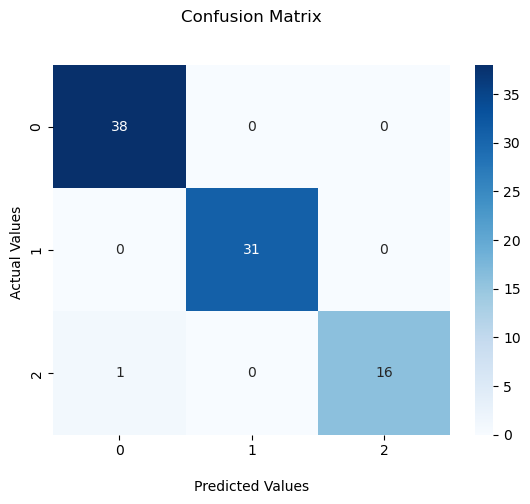

LogisticRegression F1_score Train: 0.9884
LogisticRegression F1_score Test: 0.9884


C:\Users\piotr\AppData\Local\Temp\ipykernel_17500\2759423590.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': ["Logistic Regression - standaryz. i PCA (PIPELINE)"], 'F1_score TRAIN': [f1_score_train], 'F1_score TEST': [f1_score_test]})])


In [26]:
predictions_test = model_pipeline_v1.predict(X_test)
predictions_train = model_pipeline_v1.predict(X_train)
cm = confusion_matrix(y_test, predictions_test)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()
f1_score_train = f1_score(y_train, predictions_train, average='micro').round(4)
f1_score_test = f1_score(y_test, predictions_test, average='micro').round(4)
print("LogisticRegression F1_score Train:", f1_score_train)
print("LogisticRegression F1_score Test:", f1_score_test)
metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': ["Logistic Regression - standaryz. i PCA (PIPELINE)"], 'F1_score TRAIN': [f1_score_train], 'F1_score TEST': [f1_score_test]})])


## Modele z poprzedniego modułu - do porównania

#### Dane są czyszczone tak jak było to robione w module 14.5

In [29]:
penguins = pd.read_csv('penguins.csv')
penguins.dropna(inplace=True)
features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
target = 'Species'
X, y = penguins[features], penguins[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)
scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)

#### LogisticRegression

In [31]:
model = LogisticRegression()
model.fit(X_train_standardized, y_train)
predictions_test = model.predict(X_test_standardized)
predictions_train = model.predict(X_train_standardized)
f1_score_train = f1_score(y_train, predictions_train, average='micro').round(4)
f1_score_test = f1_score(y_test, predictions_test, average='micro').round(4)
print("LogisticRegression F1_score Train:", f1_score_train)
print("LogisticRegression F1_score Test:", f1_score_test)
metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': ["LogisticRegression"], 'F1_score TRAIN': [f1_score_train], 'F1_score TEST': [f1_score_test]})])


LogisticRegression F1_score Train: 0.9958
LogisticRegression F1_score Test: 0.9709


#### KNN

In [33]:
model = KNeighborsClassifier(n_neighbors= int(X_train_standardized.shape[0]*0.01))
model.fit(X_train_standardized, y_train)
predictions_test = model.predict(X_test_standardized)
predictions_train = model.predict(X_train_standardized)
f1_score_train = f1_score(y_train, predictions_train, average='micro').round(4)
f1_score_test = f1_score(y_test, predictions_test, average='micro').round(4)
print("LogisticRegression F1_score Train:", f1_score_train)
print("LogisticRegression F1_score Test:", f1_score_test)
metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': ["KNN CLassifier"], 'F1_score TRAIN': [f1_score_train], 'F1_score TEST': [f1_score_test]})])

LogisticRegression F1_score Train: 1.0
LogisticRegression F1_score Test: 0.9903


#### DecisionTreeClassifier

In [35]:
model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=int(X_train.shape[0]*0.008))
model.fit(X_train, y_train)
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)
f1_score_train = f1_score(y_train, predictions_train, average='micro').round(4)
f1_score_test = f1_score(y_test, predictions_test, average='micro').round(4)
print("LogisticRegression F1_score Train:", f1_score_train)
print("LogisticRegression F1_score Test:", f1_score_test)
metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': ["DecisionTreeClassifier"], 'F1_score TRAIN': [f1_score_train], 'F1_score TEST': [f1_score_test]})])


LogisticRegression F1_score Train: 1.0
LogisticRegression F1_score Test: 0.9612


#### SVM

In [37]:
model = SVC(kernel='rbf', probability=True)
model.fit(X_train_standardized, y_train)
predictions_test = model.predict(X_test_standardized)
predictions_train = model.predict(X_train_standardized)
f1_score_train = f1_score(y_train, predictions_train, average='micro').round(4)
f1_score_test = f1_score(y_test, predictions_test, average='micro').round(4)
print("LogisticRegression F1_score Train:", f1_score_train)
print("LogisticRegression F1_score Test:", f1_score_test)
metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': ["SVM"], 'F1_score TRAIN': [f1_score_train], 'F1_score TEST': [f1_score_test]})])


LogisticRegression F1_score Train: 0.9874
LogisticRegression F1_score Test: 0.9806


#### RandomForestClassifier

In [39]:
model = RandomForestClassifier(n_estimators=1000, max_depth=6, min_samples_leaf=int(X_train.shape[0]*0.008))
model.fit(X_train, y_train)
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)
f1_score_train = f1_score(y_train, predictions_train, average='micro').round(4)
f1_score_test = f1_score(y_test, predictions_test, average='micro').round(4)
print("LogisticRegression F1_score Train:", f1_score_train)
print("LogisticRegression F1_score Test:", f1_score_test)
metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': ["RandomForestClassifier"], 'F1_score TRAIN': [f1_score_train], 'F1_score TEST': [f1_score_test]})])


LogisticRegression F1_score Train: 1.0
LogisticRegression F1_score Test: 0.9709


#### AdaBoostClassifier

In [41]:
model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=20)
model.fit(X_train, y_train)
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)
f1_score_train = f1_score(y_train, predictions_train, average='micro').round(4)
f1_score_test = f1_score(y_test, predictions_test, average='micro').round(4)
print("LogisticRegression F1_score Train:", f1_score_train)
print("LogisticRegression F1_score Test:", f1_score_test)
metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': ["AdaBoostClassifier"], 'F1_score TRAIN': [f1_score_train], 'F1_score TEST': [f1_score_test]})])


LogisticRegression F1_score Train: 1.0
LogisticRegression F1_score Test: 0.9709


C:\Users\piotr\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


#### ensemble  - VotingClassifier

In [43]:
model_tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=int(X_train.shape[0]*0.008))
model_tree.fit(X_train, y_train)
model_forest = RandomForestClassifier(n_estimators=1000, max_depth=6, min_samples_leaf=int(X_train.shape[0]*0.008))
model_forest.fit(X_train, y_train)
model_adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=20)
model_adaboost.fit(X_train, y_train)

model_voting = VotingClassifier(estimators=[('Tree', model_tree),
                                            ('Random Forest', model_forest),
                                            ('AdaBoost', model_adaboost)],
                                voting='soft')

model_voting.fit(X_train, y_train)
predictions_test = model_voting.predict(X_test)
predictions_train = model_voting.predict(X_train)
f1_score_train = f1_score(y_train, predictions_train, average='micro').round(4)
f1_score_test = f1_score(y_test, predictions_test, average='micro').round(4)
print("LogisticRegression F1_score Train:", f1_score_train)
print("LogisticRegression F1_score Test:", f1_score_test)
metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': ["VotingClassifier"], 'F1_score TRAIN': [f1_score_train], 'F1_score TEST': [f1_score_test]})])


C:\Users\piotr\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


LogisticRegression F1_score Train: 1.0
LogisticRegression F1_score Test: 0.9709


C:\Users\piotr\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


#### GridSearch for RandomForestClassifier

In [45]:
random_forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
params_rf = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15]}
rf_gridsearch = GridSearchCV(random_forest,
                             params_rf,
                             scoring='f1_micro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
model = rf_gridsearch.best_estimator_
model.fit(X_train, y_train)
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)
f1_score_train = f1_score(y_train, predictions_train, average='micro').round(4)
f1_score_test = f1_score(y_test, predictions_test, average='micro').round(4)
print("LogisticRegression F1_score Train:", f1_score_train)
print("LogisticRegression F1_score Test:", f1_score_test)
metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': ["RandomForestClass+GridSearch"], 'F1_score TRAIN': [f1_score_train], 'F1_score TEST': [f1_score_test]})])


Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'max_depth': 3, 'min_samples_leaf': 3}
LogisticRegression F1_score Train: 0.9749
LogisticRegression F1_score Test: 0.9612


In [46]:
metrics_dataframe

,Description,F1_score TRAIN,F1_score TEST
0,Logistic Regression - standaryz. i PCA (PIPELINE),0.9884,0.9884
0,LogisticRegression,0.9958,0.9709
0,KNN CLassifier,1.0000,0.9903
0,DecisionTreeClassifier,1.0000,0.9612
0,SVM,0.9874,0.9806
0,RandomForestClassifier,1.0000,0.9709
0,AdaBoostClassifier,1.0000,0.9709
0,VotingClassifier,1.0000,0.9709
0,RandomForestClass+GridSearch,0.9749,0.9612


#### Najlepsze wyniki na zbiorze testowym zostały otrzymane z po wytrenowaniu modelu KNN Classifier. Niemniej wszystkie użyte klasyfikatory pozwoliły otrzymać wyśmienite wyniki dla klasyfikacji danych testowych. Pipeline w którym został użyty model Logistic regresion wraz z użyciem wielomiany i PCA dał nieznacznie lepsze wyniki niż użycie zwykłego klasfikatora Logistic Regression. 